# Data Exploration

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
from collections import Counter
import string
import os

data_path = os.getenv('DATA_PATH')

In [2]:
raw_df = pd.read_csv(data_path)
slim_raw_df = raw_df[['artist_name', 'song_name', 'chords', 'genres', 'popularity']]
slim_raw_df.head(3)

,artist_name,song_name,chords,genres,popularity
0,Justin Bieber,"10,000 Hours",{3: 'G G/B ...,"['canadian pop', 'pop', 'post-teen pop']",100
1,Justin Bieber,2 Much,"{1: 'Intro: F#m7 D2 ', 4: 'F#m7 ', 8: 'D2 ', ...","['canadian pop', 'pop', 'post-teen pop']",100
2,Justin Bieber,2u (feat. David Guetta),{1: 'Em D C C...,"['canadian pop', 'pop', 'post-teen pop']",100


the song is 35 measures long.
the first 4 lines of chords are:
G-------------G/B-------------------------C-
(length: 44)
------------------G-
(length: 20)
G------------------G/B-------------------------C-
(length: 49)
----------------G-
(length: 18)


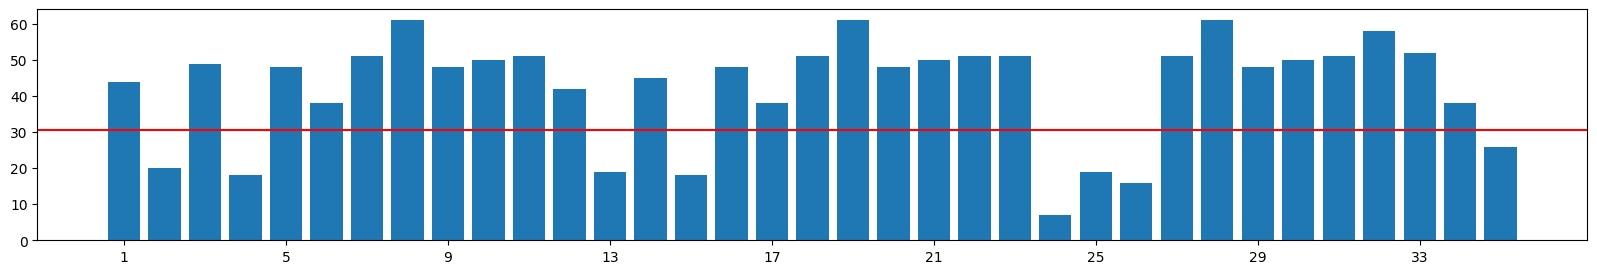

In [3]:
song_ch_lol = []
i = 0

song1 = slim_raw_df.chords[0]

song_mm_ch_dict = ast.literal_eval(song1)
song_ch_lol = [ch for ch in song_mm_ch_dict.values()]
max_line = len(song_ch_lol)

print(f'the song is {max_line} measures long.')
print('the first 4 lines of chords are:')
for ch in song_ch_lol:
    new = ch.replace(" ", "-")
    print(new)
    l = len(new)
    print(f'(length: {l})')
    i += 1
    if i == 4: break

# get line lengths
line_lens = [len(x) for x in song_ch_lol]
max_line_len = max(line_lens)

# {measure_no: chords_list}: dict
measures = [x for x in range(1, len(song_ch_lol)+1)]

fig1, ax1 = plt.subplots(figsize=(20,3))
ax1.axhline(max_line_len/2, color='red')
ax1.bar(measures, line_lens)
xt = np.arange(1, max_line+1, 4)
ax1.set(xticks=xt, xticklabels=xt)
plt.show()

#### See Chord Frequency

In [4]:
chords_ser_raw = slim_raw_df.chords.copy()

chords_ser_lists = pd.Series(index=range(len(slim_raw_df)), dtype='object')

for i, song in enumerate(chords_ser_raw):
    song_mm_ch_dict = ast.literal_eval(song)
    song_ch_lol = [ch for ch in song_mm_ch_dict.values()]
    chords_ser_lists.iloc[i] = song_ch_lol

chords_ser_lists.head()

0    [G             G/B                         C ,...
1    [Intro: F#m7  D2 , F#m7 , D2 , F#m7 ,         ...
2    [Em            D         C               C  D ...
3    [ Intro: Em  Bm  Am  C   (2x) ,           Em  ...
4    [Intro: Gm - Dm - C - C   x2 ,        Gm      ...
dtype: object

In [8]:
chords_counter = Counter()
for song in chords_ser_lists:
    for line in song:
        l = line.split(' ')
        chords_counter.update(l)
del chords_counter['']

chord_count_df = pd.Series(dict(chords_counter)).to_frame('chord_count')
sorted_cc_df = chord_count_df.sort_values(by='chord_count', ascending=False)
print('the total amount of unique "chords" is: ', len(sorted_cc_df))

the total amount of unique "chords" is:  103294


In [ ]:
# pd.options.display.max_rows = 100
# sorted_cc_df.head(100)

In [9]:
letters = list(string.ascii_uppercase)[:7]
non_chord_filter = [chord for chord in sorted_cc_df.index if chord[0] in letters]
filtered_cc_df = sorted_cc_df[sorted_cc_df.index.isin(non_chord_filter)]
print('the total amount of unique "chords" is: ', len(filtered_cc_df))

the total amount of unique "chords" is:  77872


In [ ]:
# pd.set_option('display.max_rows', 200)
# filtered_cc_df.iloc[0:200]

In [ ]:
# slim_chord_counts_dict = {}
# for chord, count in chords_count_dict.items():
#     if count <= low_freq_to_remove:
#         pass
#     else:
#         slim_chord_counts_dict[chord] = count